- y = 1 / (1 + e<sup>-x</sup>)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

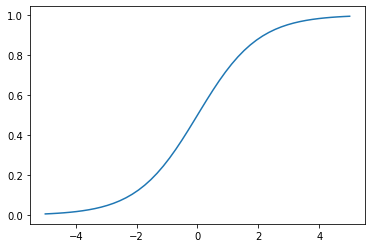

In [2]:
# sigmoid 함수는 0과 1사이의 값으로 이루어진다.
def sigmoid_function(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-5, 5)
y = sigmoid_function(x)

plt.plot(x, y)
plt.show()

- y<sup>'</sup> = (1 - y) * y

### tanh

y = (e<sup>x</sup> - e<sup>-x</sup>) / (e<sup>x</sup> + e<sup>-x</sup>)

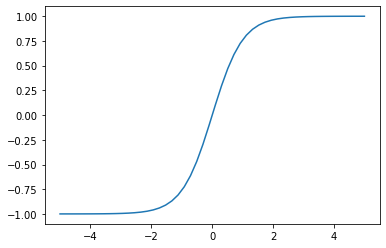

In [3]:
# tanh 함수는 -1과 1사이의 값으로 이루어진다.
def tanh_function(x):
    return np.tanh(x)

x = np.linspace(-5, 5)
y = tanh_function(x)

plt.plot(x,y)
plt.show()

### ReLU(Rectified Linear Unit)

y = if x <= 0 then 0 else x

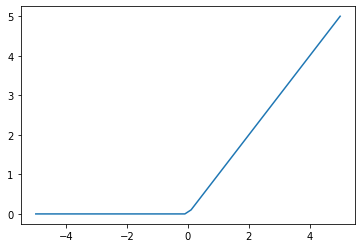

In [4]:
def relu_function(x):
    return np.where(x <= 0, 0, x)

x = np.linspace(-5, 5)
y = relu_function(x)

plt.plot(x,y)
plt.show()

### Leaky ReLU
- y = if x <= 0 then 0.01x else x
- x가 음수인 영역에서 아주 작은 기울기를 생성
- 출력이 0이 되어 더 이상 학습이 진행되지 않는 뉴런이 발생하는 dying ReLU 현상을 피하기 위해 사용

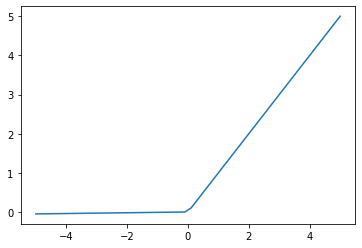

In [5]:
def leaky_relu_function(x):
    return np.where(x <= 0, 0.01*x, x)

x = np.linspace(-5, 5)
y = leaky_relu_function(x)

plt.plot(x,y)
plt.show()

### Softmax
- 입력받은 값을 출력으로 0 ~ 1 사이의 값으로 모두 정규화
- 출력 값들의 총합은 항상 1

In [6]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

y = softmax_function(np.array([1, 2, 3]))
print(y)

[0.09003057 0.24472847 0.66524096]


### 단일 신경망 구축
- 딥러닝에서 가중치(w)와 bias(b) 는 임의의 수로 설정 후 학습하는 과정에서 갱신함
- 지금은 가중치와 bias를 고정하고, 이 값들이 실제 신경망출력에 어떤 의미를 가지는지 확인함
- 입력으로 단 두개의 값(feature) x<sub>1</sub>, x<sub>2</sub>
- 활성화 함수로 시그모이드 함수 사용

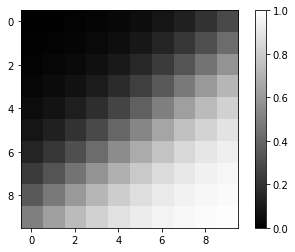

In [7]:
x1 = np.arange(-1.0, 1.0, 0.2)
x2 = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

W = np.array([2.5, 3.0])

bias = np.array([0.1])

for i in range(10):
    for j in range(10):
        list1 = [x1[i], x2[j]]
        X = np.array(list1)
        u = np.dot(X, W.T) + bias
        y = 1/(1 + np.exp(-u))
        Z[j][i] = y

plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

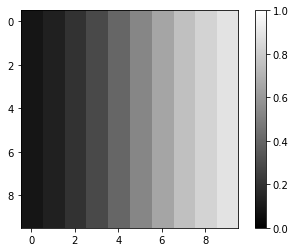

In [8]:
x1 = np.arange(-1.0, 1.0, 0.2)
x2 = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

W = np.array([2.5, 0])

bias = np.array([0.1])

for i in range(10):
    for j in range(10):
        list1 = [x1[i], x2[j]]
        X = np.array(list1)
        u = np.dot(X, W.T) + bias
        y = 1/(1 + np.exp(-u))
        Z[j][i] = y

plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

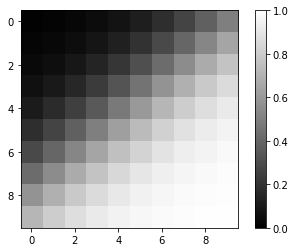

In [9]:
x1 = np.arange(-1.0, 1.0, 0.2)
x2 = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

W = np.array([2.5, 3.0])

bias = np.array([1.0])

for i in range(10):
    for j in range(10):
        list1 = [x1[i], x2[j]]
        X = np.array(list1)
        u = np.dot(X, W.T) + bias
        y = 1/(1 + np.exp(-u))
        Z[j][i] = y

plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

- Input Layer 입력 2개, Hidden Layer 노드 2개, Output Layer 노드 1개
- Hidden Layer 활성화함수 시그모이드
- Output Layer 활성화함수 항등함수

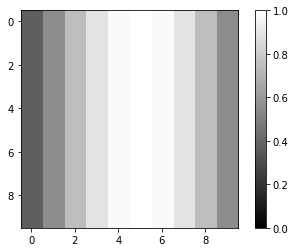

In [10]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

w_im = np.array([[4.0, 4.0], [4.0, 4.0]])
w_mo = np.array([[1.0], [-1.0]])

b_im = np.array([3.0, -3.0])
b_mo = np.array([0.1])

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u

for i in range(10):
    for j in range(10):
        inp = np.array(X[i], Y[i])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[j][i] = out[0]
        
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

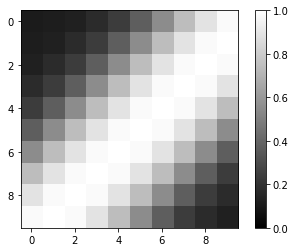

In [11]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

w_im = np.array([[4.0, 4.0], [4.0, 4.0]])
w_mo = np.array([[1.0], [-1.0]])

b_im = np.array([3.0, -3.0])
b_mo = np.array([0.1])

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u

for i in range(10):
    for j in range(10):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[j][i] = out[0]
        
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

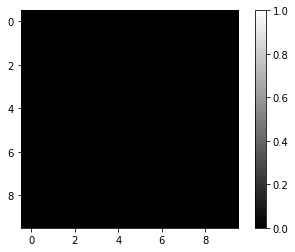

In [12]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

w_im = np.array([[-5.0,-5.0], [5.0,-5.0]])
w_mo = np.array([[1.0], [-1.0]])

b_im = np.array([0.0,0.0])
b_mo = np.array([0.0])

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u

for i in range(10):
    for j in range(10):
        inp = np.array(X[i], Y[i])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[j][i] = out[0]
        
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

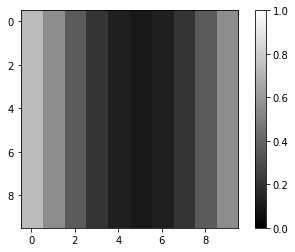

In [13]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

w_im = np.array([[4.0, 4.0], [4.0,4.0]])
w_mo = np.array([[-1.0], [1.0]])
b_im = np.array([3.0,-3.0])
b_mo = np.array([1.0])

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u

for i in range(10):
    for j in range(10):
        inp = np.array(X[i], Y[i])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[j][i] = out[0]
        
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

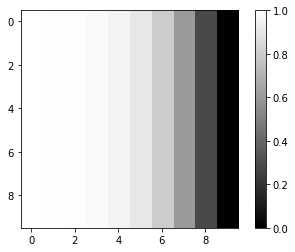

In [14]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

w_im = np.array([[-4.0, 4.0], [-4.0,-4.0]])
w_mo = np.array([[1.0], [-1.0]])
b_im = np.array([3.0,-3.0])
b_mo = np.array([0.0])

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u

for i in range(10):
    for j in range(10):
        inp = np.array(X[i], Y[i])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[j][i] = out[0]
        
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

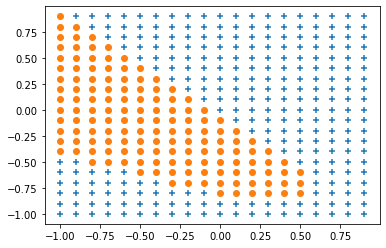

In [16]:
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0, 1.0, 0.1)

w_im = np.array([[1.0, 2.0], [2.0, 3.0]])
w_mo = np.array([[-1.0, 1.0], [1.0, -1.0]])

b_im = np.array([0.3, -0.3])
b_mo = np.array([0.4, 0.1])

def middle_layer(x, y, b):
    u = np.dot(x, y) + b
    return 1 / (1 + np.exp(-u)) # 시그모이드

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u) / np.sum(np.exp(u)) # 소프트 맥스

x_1 = []
y_1 = []
x_2 = []
y_2 = []

for i in range(20):
    for j in range(20):
        
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
            
plt.scatter(x_1, y_1, marker='+')
plt.scatter(x_2, y_2, marker='o')
plt.show()

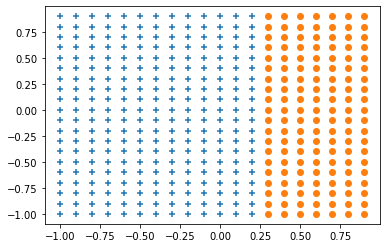

In [18]:
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0, 1.0, 0.1)

w_im = np.array([[2.0,1.0], [0.0,3.0]])
w_mo = np.array([[-2.0,1.0], [-1.0,-1.0]])

# 편향
b_im = np.array([-0.3,-0.3])
b_mo = np.array([0.4,-1.2])

def middle_layer(x, y, b):
    u = np.dot(x, y) + b
    return 1 / (1 + np.exp(-u)) # 시그모이드

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u) / np.sum(np.exp(u)) # 소프트 맥스

x_1 = []
y_1 = []
x_2 = []
y_2 = []

for i in range(20):
    for j in range(20):
        
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
            
plt.scatter(x_1, y_1, marker='+')
plt.scatter(x_2, y_2, marker='o')
plt.show()

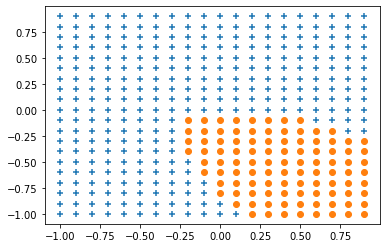

In [21]:
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0, 1.0, 0.1)

w_im = np.array([[2.0,2.0], [2.0,3.0]])
w_mo = np.array([[-1.0,1.0], [1.0,-1.0]])

# 편향
b_im = np.array([0.3,-0.3])
b_mo = np.array([0.4,0.1])

def middle_layer(x, y, b):
    u = np.dot(x, y) + b
    return 1 / (1 + np.exp(-u)) # 시그모이드

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u) / np.sum(np.exp(u)) # 소프트 맥스

x_1 = []
y_1 = []
x_2 = []
y_2 = []

for i in range(20):
    for j in range(20):
        
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
            
plt.scatter(x_1, y_1, marker='+')
plt.scatter(x_2, y_2, marker='o')
plt.show()